In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

In [2]:
imdb_data = pd.read_csv('Dataset/IMDB Dataset.csv')

In [3]:
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
imdb_data.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  I see that C. Thomas Howell has appeared in ma...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [7]:
imdb_data['length'] = imdb_data['review'].apply(len)
imdb_data['review'] = imdb_data['review'].str.lower()
imdb_data.head()

,review,sentiment,length
0,one of the other reviewers has mentioned that ...,positive,1761
1,a wonderful little production. <br /><br />the...,positive,998
2,i thought this was a wonderful way to spend ti...,positive,926
3,basically there's a family where a little boy ...,negative,748
4,"petter mattei's ""love in the time of money"" is...",positive,1317


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

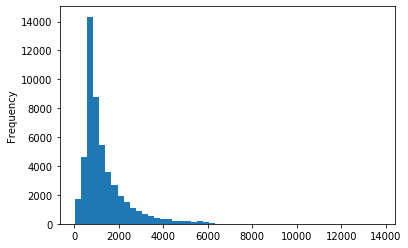

In [9]:
imdb_data['length'].plot(bins=50, kind='hist') 

In [10]:
imdb_data.length.describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a27df3d10>,
      dtype=object)

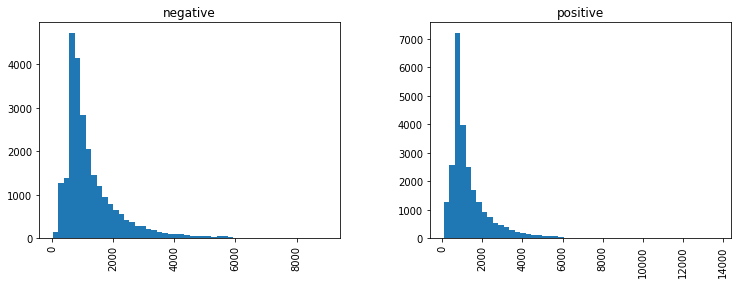

In [11]:
imdb_data.hist(column='length', by='sentiment', bins=50,figsize=(12,4))

In [12]:
def text_process(mess):
    import string
    
#     replace line break with blank
    mess = mess.replace("<br />","")
#     replace /' with blank
    mess = mess.replace("\ '","")
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
#     print(mess)
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in nopunc.split() if word.isalpha()]
#     print(tokens)
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
#     print(tokens)
    # Now just remove any stopwords
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
#     print(tokens)
    return [' '.join(tokens)]

In [13]:
imdb_data['review'] = imdb_data['review'].head(10).apply(text_process)

In [14]:
# Regex
# import re
# sentence = "The development of snowboarding was inspired by skateboarding, sledding, surfing and skiing."
# pattern = r"[^\w]"
# print(re.sub(pattern, " ", sentence))

In [15]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
new_list = {'abc':[]}
def stemmer_and_lemmatizer(stemmer, lemmatizer, data, pos):
    for t in data:
        temp1 = []
        temp = [stemmer.stem(word) for word in t ]
        temp1 = "".join([lemmatizer.lemmatize(word, pos) for word in temp])
        new_list['abc'].append(temp1)

In [16]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stemmer_and_lemmatizer(stemmer, lemmatizer, imdb_data['review'].head(10), pos = wordnet.VERB)

In [17]:
imdb_data = pd.concat([imdb_data, pd.DataFrame(np.array(new_list['abc']))], axis = 1)

In [21]:
imdb_data = imdb_data.rename{'0':'S&L'}

SyntaxError: invalid syntax (<ipython-input-21-bcf9006afbb9>, line 1)

In [19]:
print(imdb_data.head(10))

                                              review sentiment  length  \
0  [one reviewers mentioned watching oz episode y...  positive    1761   
1  [wonderful little production filming technique...  positive     998   
2  [thought wonderful way spend time hot summer w...  positive     926   
3  [basically theres family little boy jake think...  negative     748   
4  [petter matteis love time money visually stunn...  positive    1317   
5  [probably alltime favorite movie story selfles...  positive     656   
6  [sure would like see resurrection dated seahun...  positive     726   
7  [show amazing fresh innovative idea first aire...  negative     934   
8  [encouraged positive comments film looking for...  negative     681   
9  [like original gut wrenching laughter like mov...  positive     176   

                                                   0  
0  one reviewers mentioned watching oz episode yo...  
1  wonderful little production filming technique ...  
2  thought wonderful